<a href="https://colab.research.google.com/github/DrBharathiTC/HEALTH-INSURANCE-CROSS-SELL-PREDICTION.ipynb/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **Contents**


*Importing Libraries
*Import Data
*Data Summary
*Data Visualization
*Data Cleaning ( EDA )
*Feature Selection
*Model Selection
*Hyperparameter Tuning
*Conclusion

In [ ]:
#Installing package
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.1/252.1 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=a3c0a50f0cc1f0d7eabd3e544494f8adeab661a1d9a47fb41030bd6292cecf61
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [ ]:
pip install scikit-optimize 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 12.9 MB/s eta 0:00:00


# 1.Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as ltb

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from skopt.space import Real, Categorical, Integer

# 2. Import Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
DF1=pd.read_csv("/content/drive/My Drive/almabetter projects/Health insurance cross cell prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [ ]:
#Copying the dataset
HIDF1=DF1.copy()

# 3. Data Summary

In [ ]:
HIDF1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
HIDF1.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
HIDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
HIDF1.shape

(381109, 12)

In [ ]:
HIDF1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# **Dataset details**
A new DataFrame where we have columns name of this df along with datatype , missing value no , unique values no , first value , second value

In [ ]:
def DataInfoAll(HIDF1):
    print(f"Dataset Shape: {HIDF1.shape}")
    print("-"*75)
    summary = pd.DataFrame(HIDF1.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = HIDF1.isnull().sum().values    
    summary['Uniques'] = HIDF1.nunique().values
    summary['First Value'] = HIDF1.iloc[0].values
    summary['Second Value'] = HIDF1.iloc[1].values
    return summary


In [ ]:
DataInfoAll(HIDF1)

Dataset Shape: (381109, 12)
---------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,id,int64,0,381109,1,2
1,Gender,object,0,2,Male,Male
2,Age,int64,0,66,44,76
3,Driving_License,int64,0,2,1,1
4,Region_Code,float64,0,53,28.0,3.0
5,Previously_Insured,int64,0,2,0,0
6,Vehicle_Age,object,0,3,> 2 Years,1-2 Year
7,Vehicle_Damage,object,0,2,Yes,No
8,Annual_Premium,float64,0,48838,40454.0,33536.0
9,Policy_Sales_Channel,float64,0,155,26.0,26.0


There is no Null value present in this dataset.
All the numerical values are present in integer or float datatype 

### *Let's check outlier present in all numerical columns* 

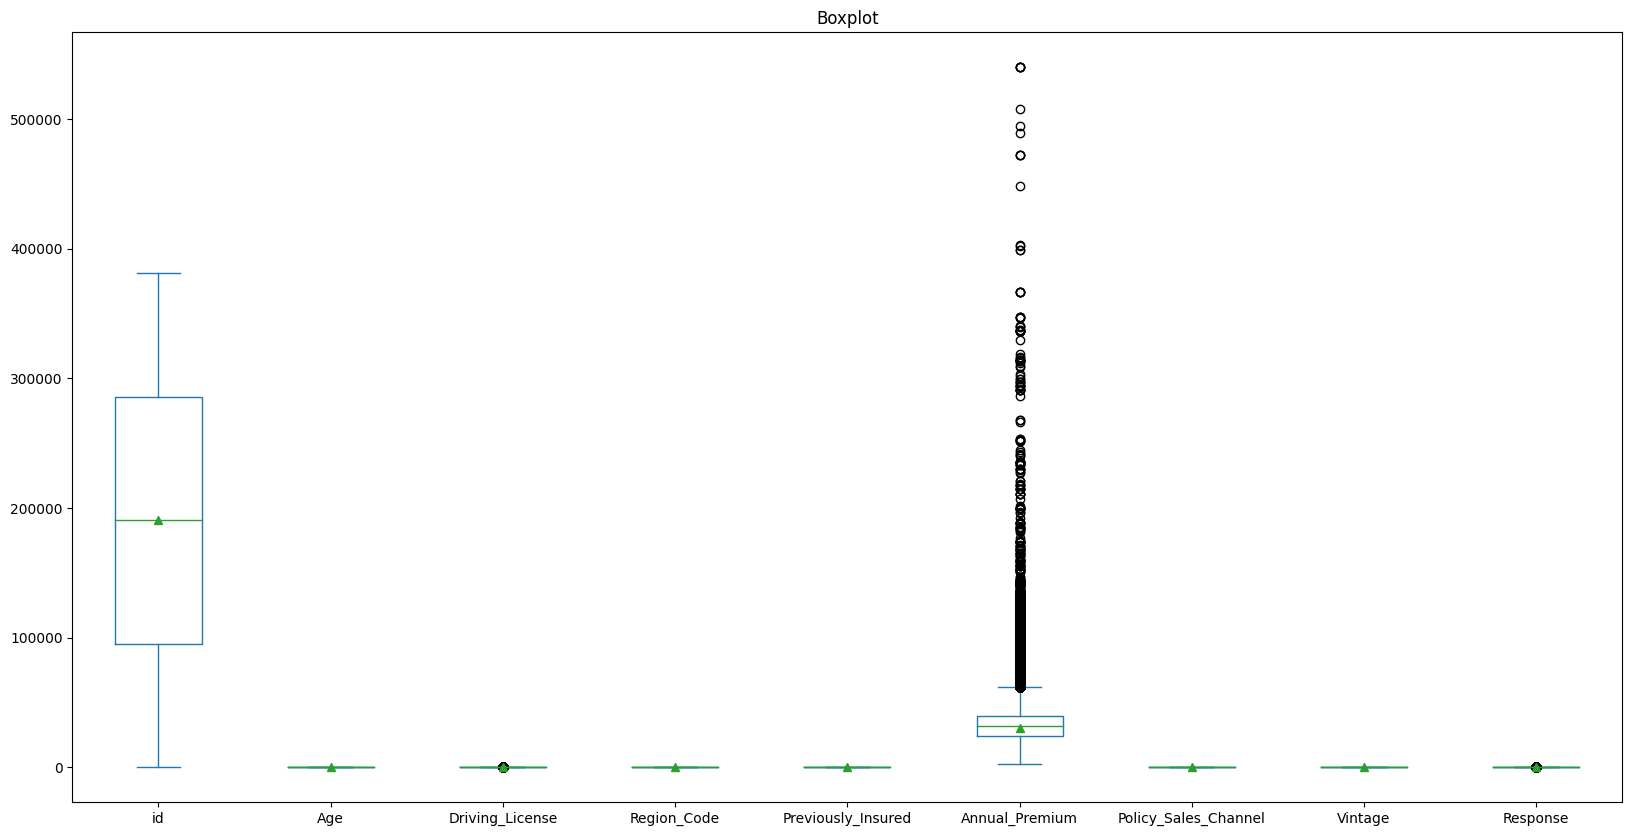

In [ ]:
plt.rcParams['figure.figsize']=(20,10)
ax =HIDF1[list(HIDF1.describe())].plot(kind='box', title='Boxplot', showmeans=True)

plt.show()

As you can see
* Annual_Premium has the highest outliers present in this dataset
* Driving_License has very less outliers.
* Response has very less outliers.

In [ ]:
HIDF1.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Checking duplicate values

In [ ]:
duplicate = HIDF1[HIDF1.duplicated()]
print(f"There are {duplicate.shape[0]} duplicate rows present in the dataset.")

There are 0 duplicate rows present in the dataset.


# Checking NaN values

In [ ]:
HIDF1.isna().sum().to_frame().T

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,0,0,0,0,0,0,0,0,0,0


### Categorical features statistics details

The following argument will help us to mention categorical columns and will also show a summary of all the categorical features.



In [ ]:
HIDF1.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Observation -

In our dataset, there are more men than women.
The age range of 1-2 year vehicles is higher in our dataset.
Many of the clients' vehicles have been damaged.

# **Data Visualization**  - Exploratory Data Analysis

# Target Variable

In [ ]:
#Storing target column into a variable 
Dependent_variable = HIDF1['Response']

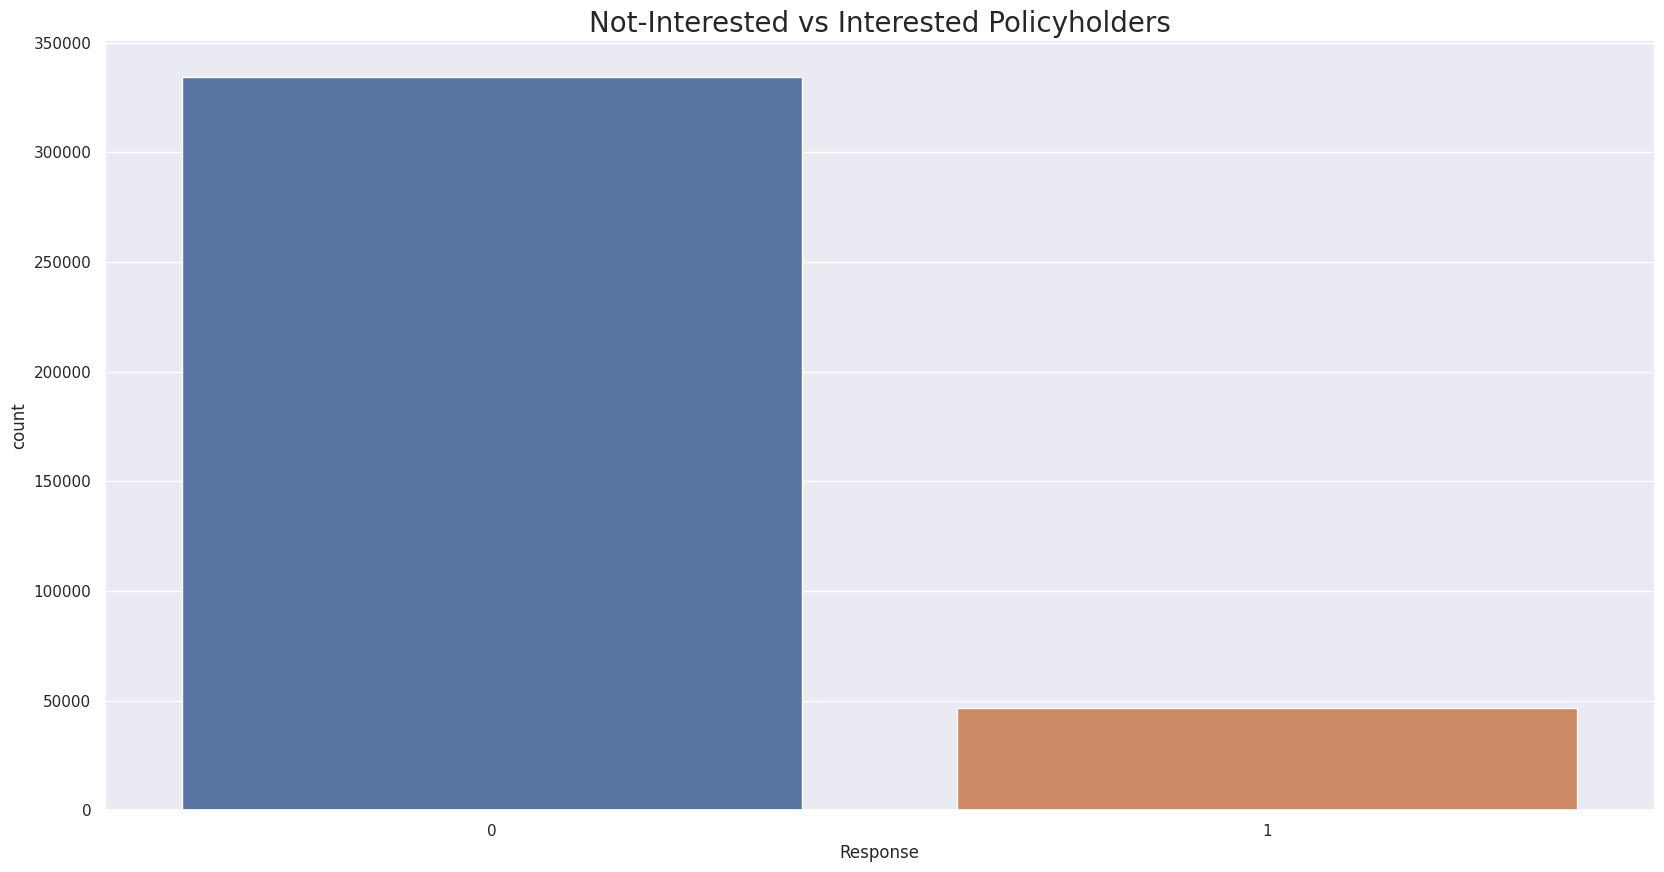

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Response', data=HIDF1)
plt.title('Not-Interested vs Interested Policyholders', fontsize=20) #title for the countplot
plt.show()

### The data is highly imbalanced.
As you can see in above graph, there are very few interested customers whose stats are less than 50000 and those above 300000 are not interested

In [ ]:
HIDF1.Response.value_counts()/HIDF1.shape[0]

0    0.877437
1    0.122563
Name: Response, dtype: float64

Observation -

The dependant variable has binary values of 0 and 1. We can infer from the plot above that many clients have no interest in purchasing vehicle insurance. 12.2 percent of the data are 1's and 87.7 percent of the data are 0s. This data must be handled using the imbalance technique since the output feature is unbalanced.

### Gender

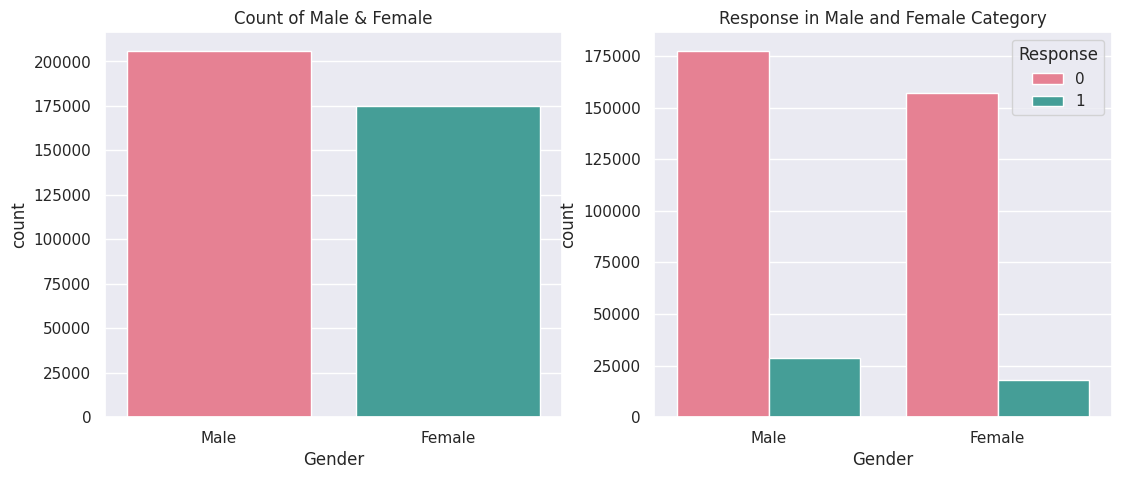

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=HIDF1, palette='husl')
plt.title("Count of Male & Female")
plt.subplot(1,2,2)
sns.countplot(x='Gender', hue='Response', data=HIDF1, palette="husl")
plt.title("Response in Male and Female Category")
plt.show()

In [ ]:
a = HIDF1.groupby('Gender')['Age'].mean()
a

Gender
Female    36.372746
Male      40.903095
Name: Age, dtype: float64

* The gender variable ratio in the dataset is almost equal, male category is slightly more than female and also the chances of buying insurance is also little high than female.

* The number of male is greater than 200000 and The number of female is close to 175000. The number of male is intersted which is greater than 25000 and The number of female is intersted which is below 25000.Male category is slightly greater than that of female and chances of buying the insurance is also little high

## Age vs Response

<Axes: xlabel='Age', ylabel='count'>

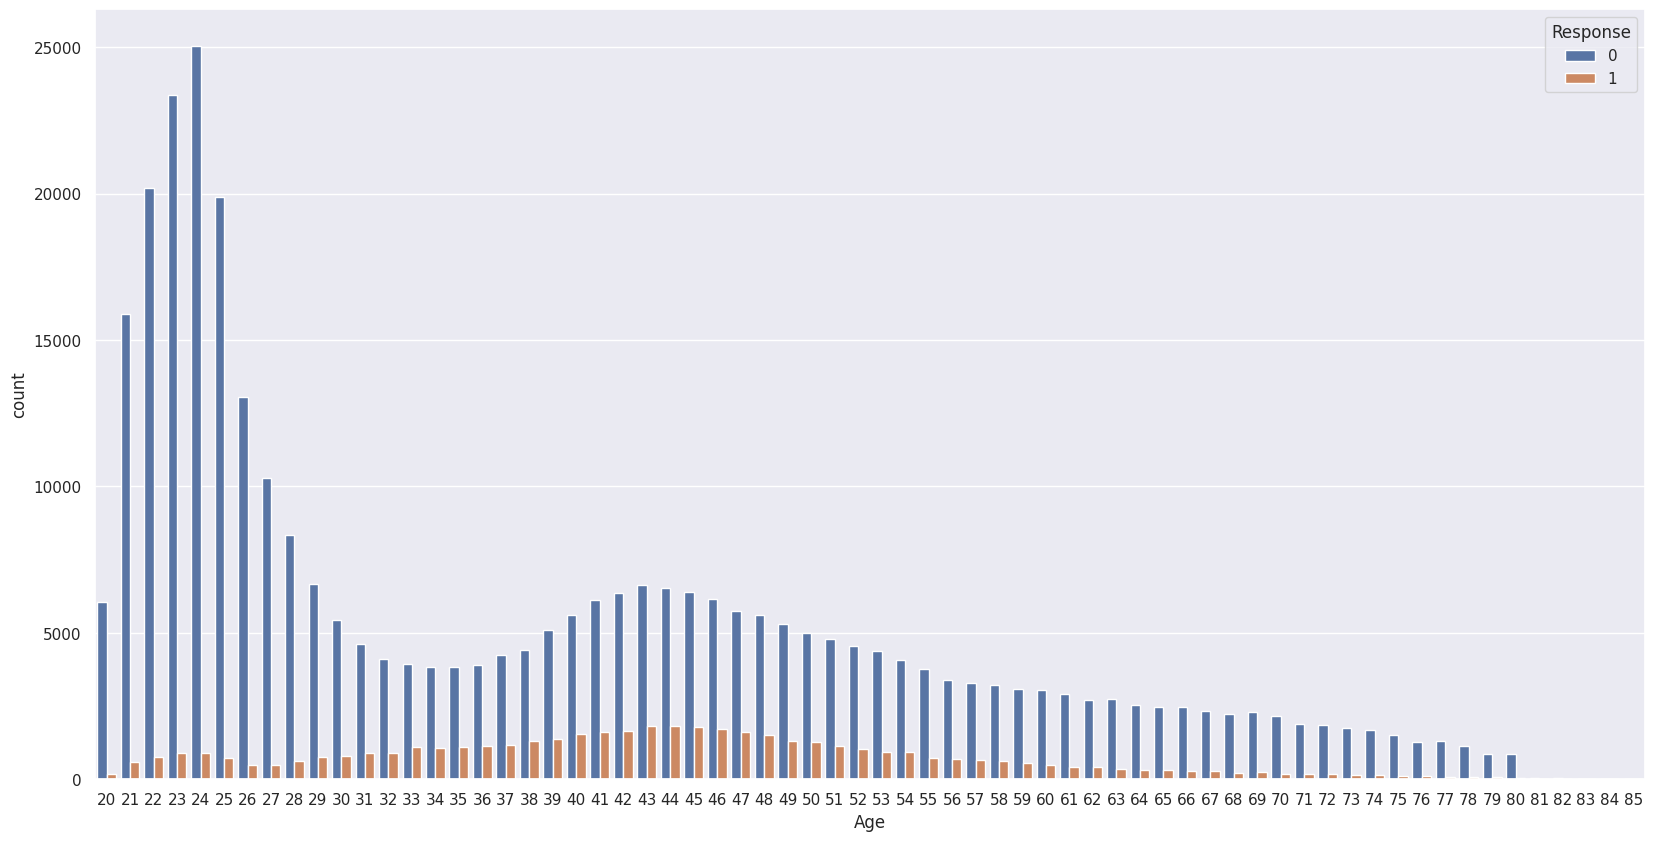

In [ ]:
#### Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=HIDF1)

* Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
* People aged between 30-60 are more likely to be interested.



<Axes: >

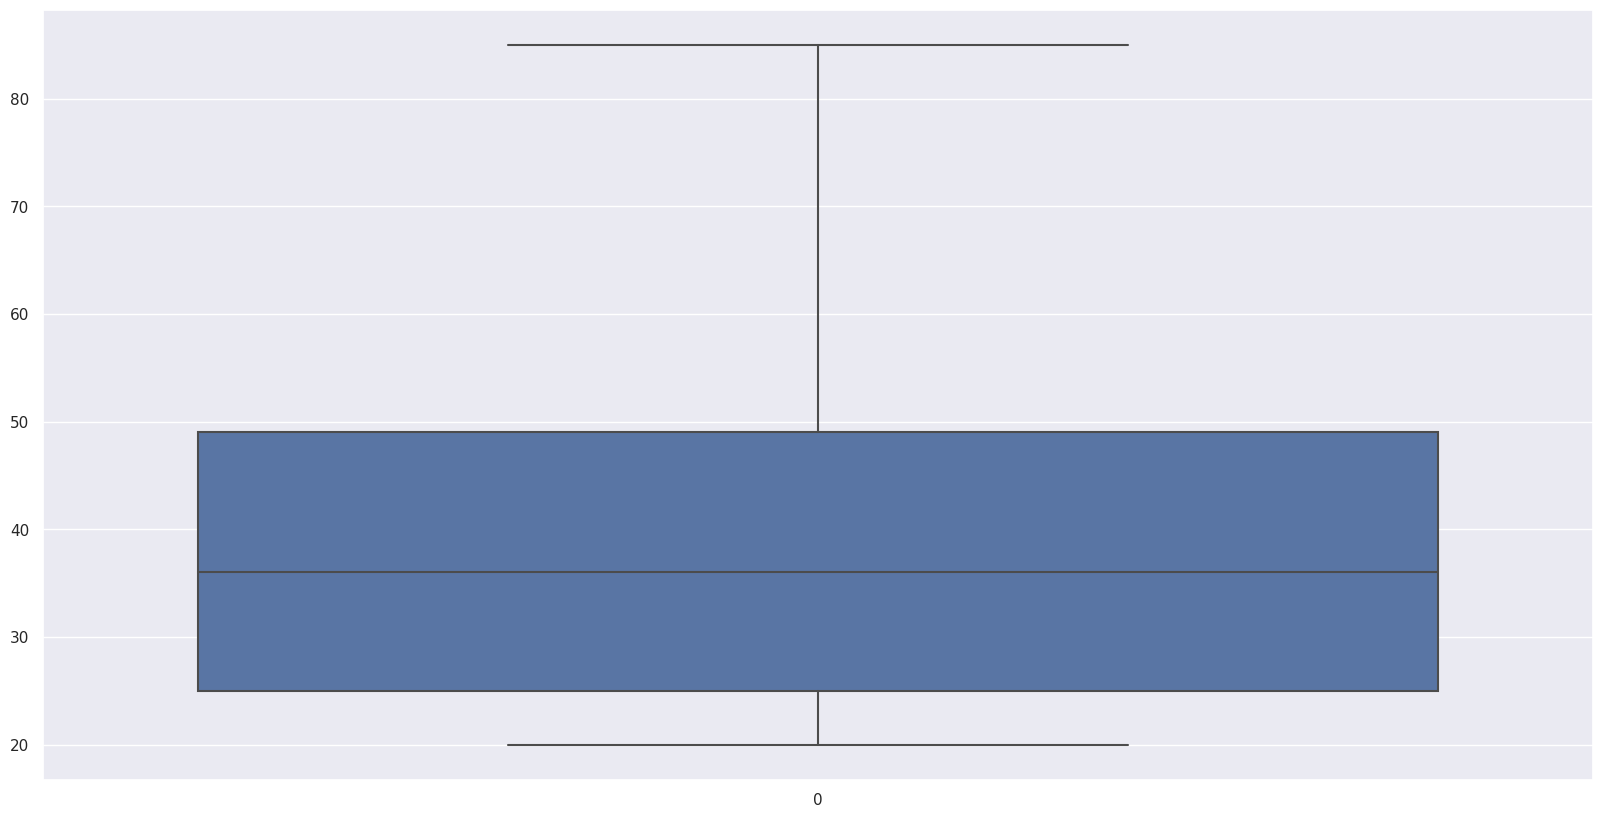

In [ ]:
sns.boxplot(HIDF1['Age'])

As you can see there is no outliers present in Age

In [ ]:
HIDF1.Driving_License.value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

<Axes: xlabel='Driving_License', ylabel='count'>

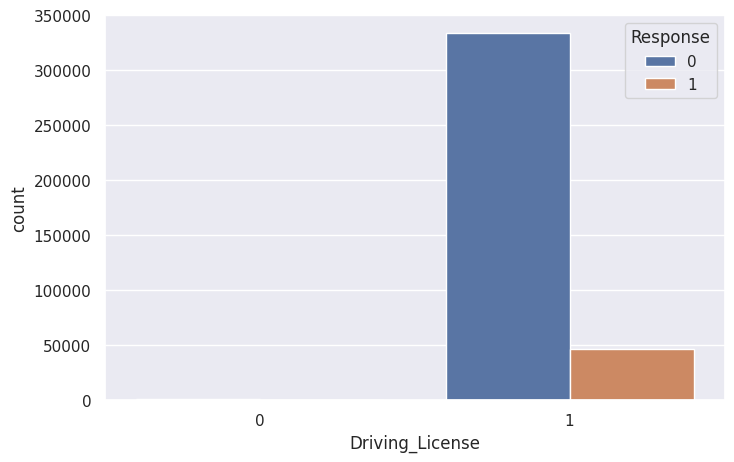

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(x='Driving_License', hue='Response', data=HIDF1)

* Customers who are interested in Vehicle Insurance almost all have driving license


# Previously_Insured Vs Response

<Axes: xlabel='Previously_Insured', ylabel='count'>

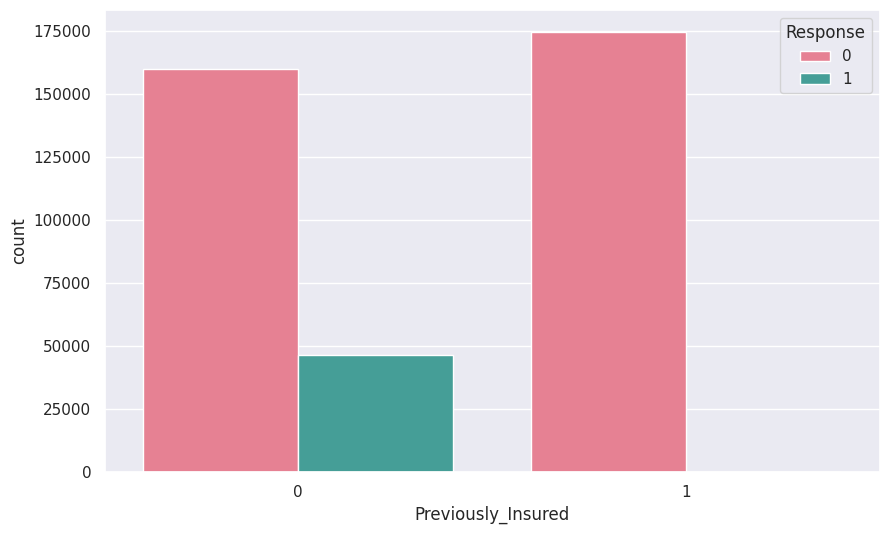

In [ ]:
plt.figure( figsize = (10 , 6))
sns.countplot(x = 'Previously_Insured' , hue = 'Response' , data = HIDF1 , palette = 'husl' )


* Those who have not insurance some of them are taking insurance

# Vehicle_Age Vs Response

In [ ]:
HIDF1.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

(-0.5, 2.5, 10.0, 175000.0)

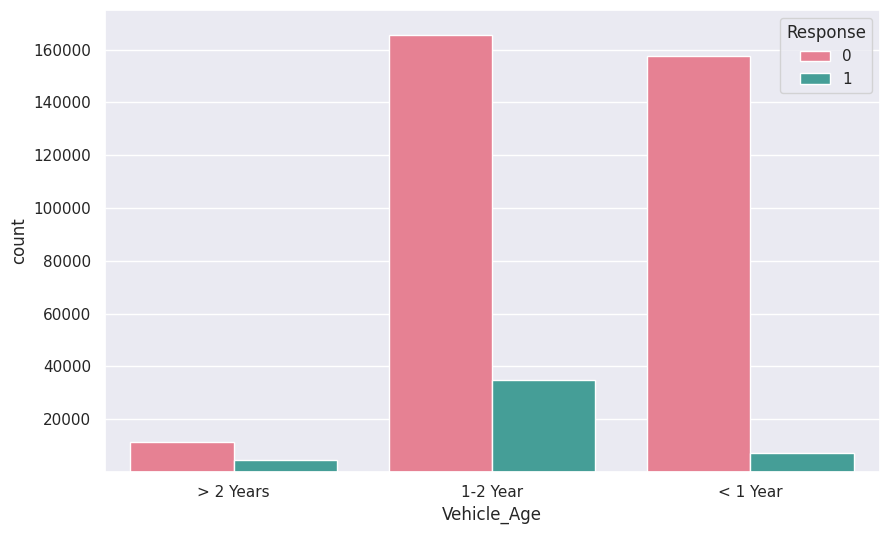

In [ ]:
plt.figure( figsize = (10 , 6))
sns.countplot(x = 'Vehicle_Age' , hue = 'Response' , data = HIDF1 , palette = 'husl')
plt.axis([None,None,10,175000])

* From seeing this graph we can say that if the vehicle's age is in between 1 to 2 years ,those vehicle owners are more likely to buy insurance

* No of customers with Vehicle_Age >2 is more than the no of customers whose Vehicle_Age< 1

## Region code Vs Response

Text(0.5, 1.0, 'Response in terms of Region_Code')

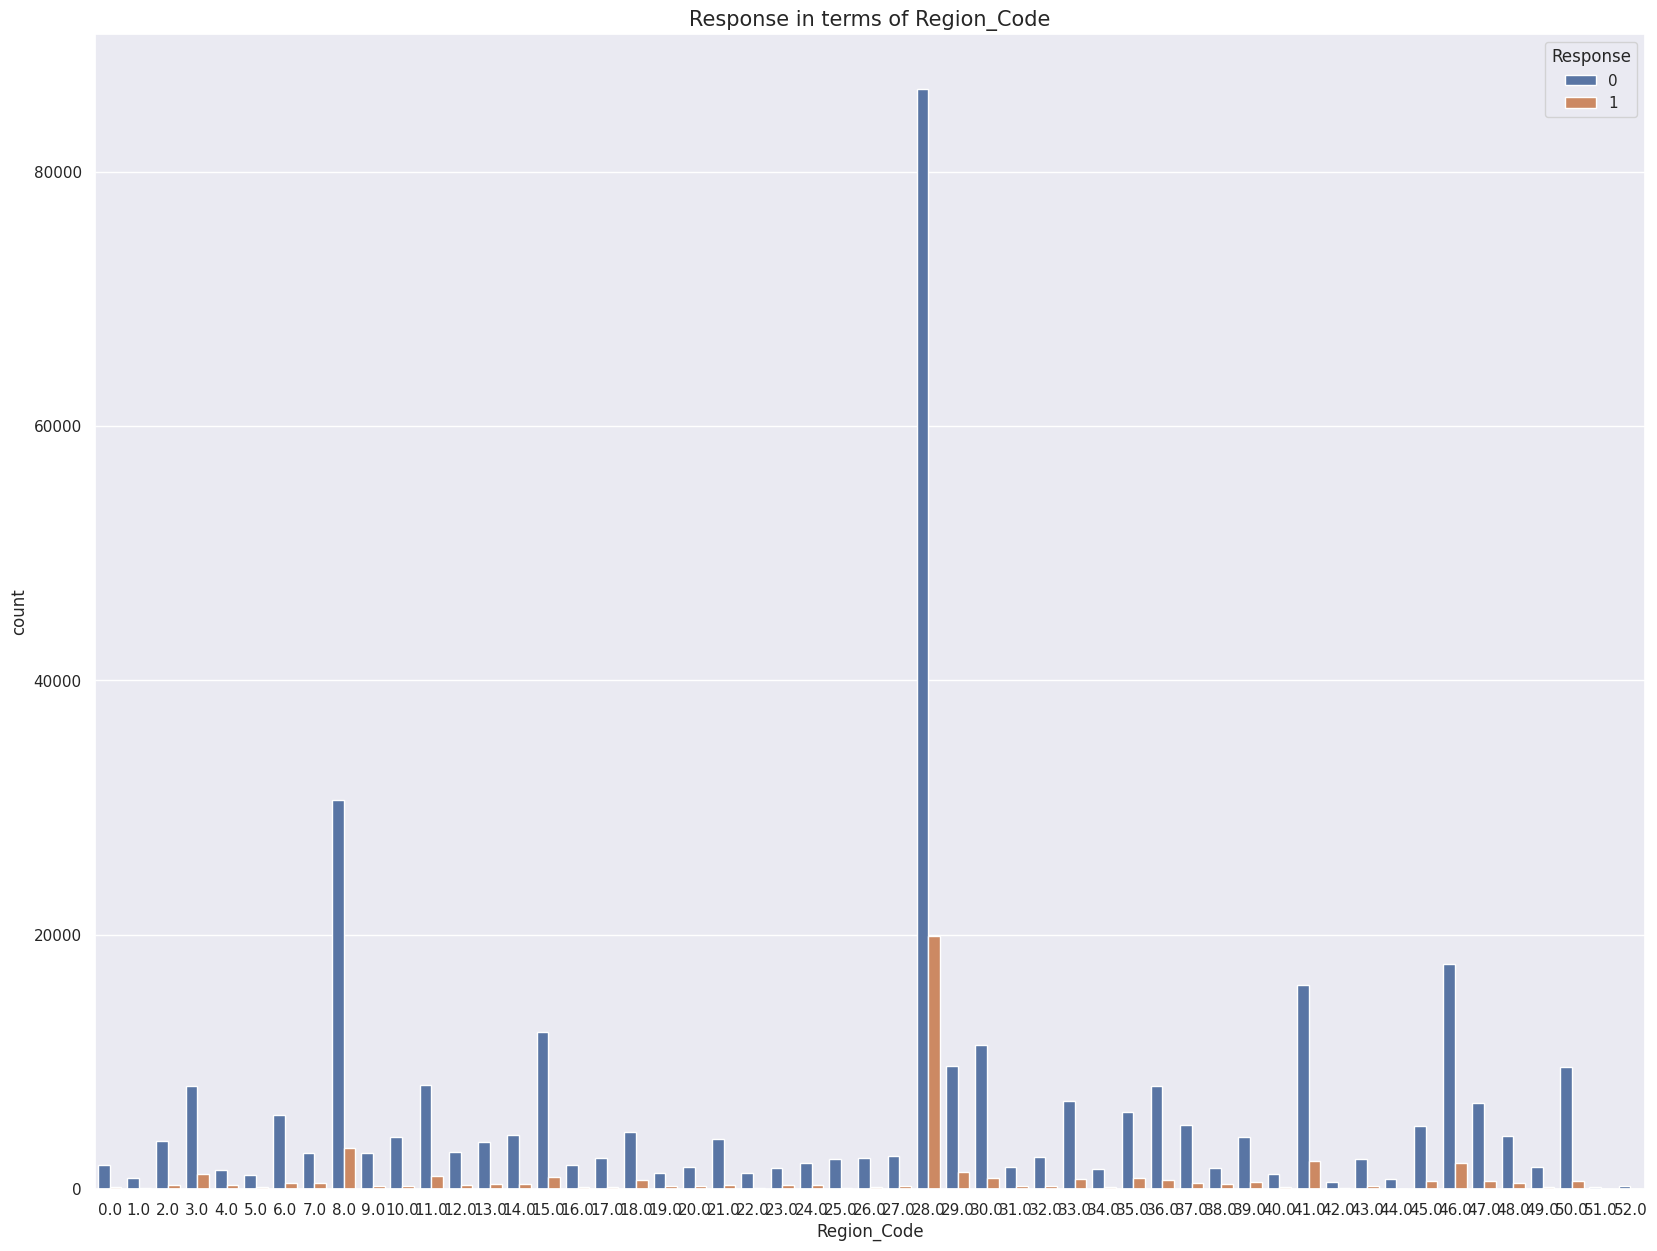

In [ ]:
plt.figure(figsize = (20,15))
sns.countplot(x='Region_Code', hue='Response', data=HIDF1)
plt.title('Response in terms of Region_Code', fontsize=15)


*   Region Code - 0.28 has more customers


## Vehicle_Damage Vs Response

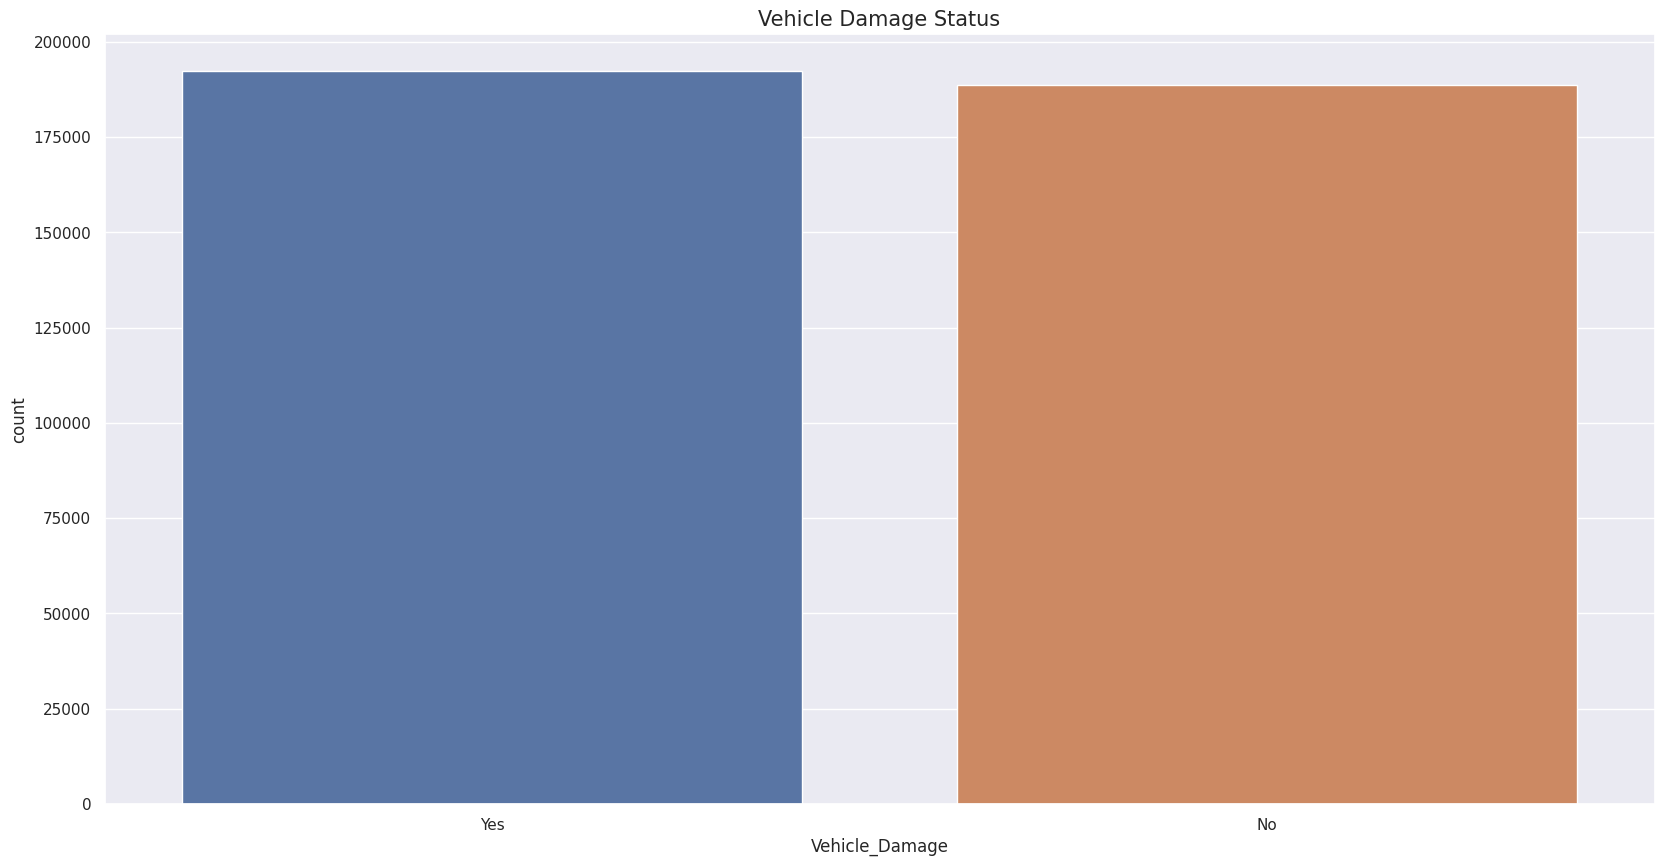

In [ ]:
sns.countplot(x=HIDF1['Vehicle_Damage'], data=HIDF1)
plt.title('Vehicle Damage Status', fontsize=15)
plt.show()

We can infer from the above plot that the number of policyholders for both vehicle damage statuses are almost equal.

# Annual_Premium

<ipython-input-33-e38ced8078a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HIDF1['Annual_Premium'], color='green')


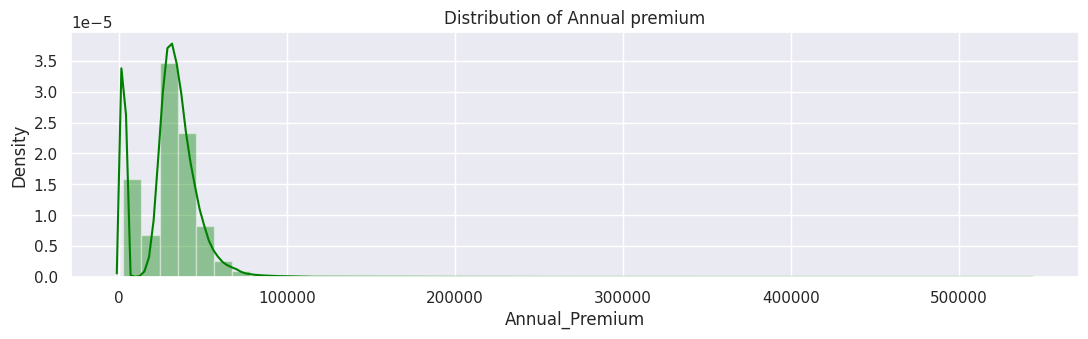

In [ ]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(HIDF1['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

* From the distribution plot we can infer that the annual premimum variable is right skewed.


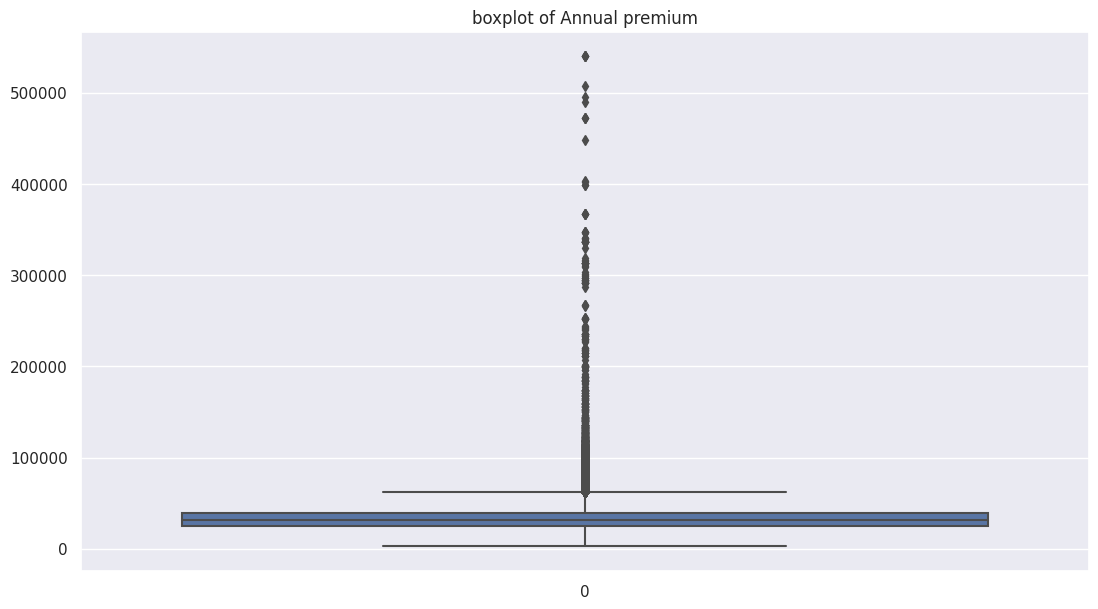

In [ ]:
plt.figure(figsize=(13,7))
sns.boxplot(HIDF1['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

* As you can see that in the column Annual_premium there are many outliers present

## Coverting Categorical columns into Numerical columns using Encoding techniques


Label Encoding on Vehicle_Age and Vehicle_Damage columns

In [ ]:
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
HIDF1['Vehicle_Age'] = labelEncoder.fit_transform(HIDF1['Vehicle_Age'])
HIDF1['Vehicle_Damage'] = labelEncoder.fit_transform(HIDF1['Vehicle_Damage'])

One Hot Encoding on Gender Column

In [ ]:
#One hot encoder on Gender
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(HIDF1[['Gender']]).toarray())
names=enc.get_feature_names_out()
enc_data.columns=names
df1=HIDF1.join(enc_data)

In [ ]:
#Data after Encoding
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  Gender_Female         381109 non-null  float64
 13  Gender_Male           381109 non-null  float64
dtypes: float64(5), int64(8), object(1)
memory usage: 40.

Observation -

We can see that all columns have been numerically converted.

We are removing the gender column since we have separated into two columns, Gender Female and Gender Male.

In [ ]:
#Removing Gender feature
df1.drop('Gender',axis=1,inplace=True)

In [ ]:
#Checking shape after adding/removing features
df1.shape

(381109, 13)

In [ ]:
df1.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.0,1.0
1,2,76,1,3.0,0,0,0,33536.0,26.0,183,0,0.0,1.0
2,3,47,1,28.0,0,2,1,38294.0,26.0,27,1,0.0,1.0
3,4,21,1,11.0,1,1,0,28619.0,152.0,203,0,0.0,1.0
4,5,29,1,41.0,1,1,0,27496.0,152.0,39,0,1.0,0.0


In [ ]:
#Once again checking the duplicates
duplicate = df1[df1.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response, Gender_Female, Gender_Male]
Index: []


No Duplicates found in this dataset.

## Variance Threshold Removal

Using this method we can check which columns have constant values.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#Implementation Variance Threshold
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df1)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Observation -

In our data set, there isn't a single column with constant values.italicised text

## Feature Selection using f_classification
## Seperating Dependent and Independent Variables

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
independent = df1.drop(['Response'], axis=1) #Contain all independent variables
dependent = df1['Response'] #Contain Dependent variable

In [ ]:
#Finding scores of each feature
f_scores = f_classif(independent, dependent)
f_scores

(array([7.13370735e-01, 4.76694479e+03, 3.93066928e+01, 4.25827356e+01,
        5.02033540e+04, 4.17348459e+03, 5.47422454e+04, 1.94317587e+02,
        7.51301151e+03, 4.20468707e-01, 1.05091307e+03, 1.05091307e+03]),
 array([3.98327606e-001, 0.00000000e+000, 3.62583444e-010, 6.78391651e-011,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.72231514e-044,
        0.00000000e+000, 5.16703652e-001, 3.18074235e-230, 3.18074235e-230]))

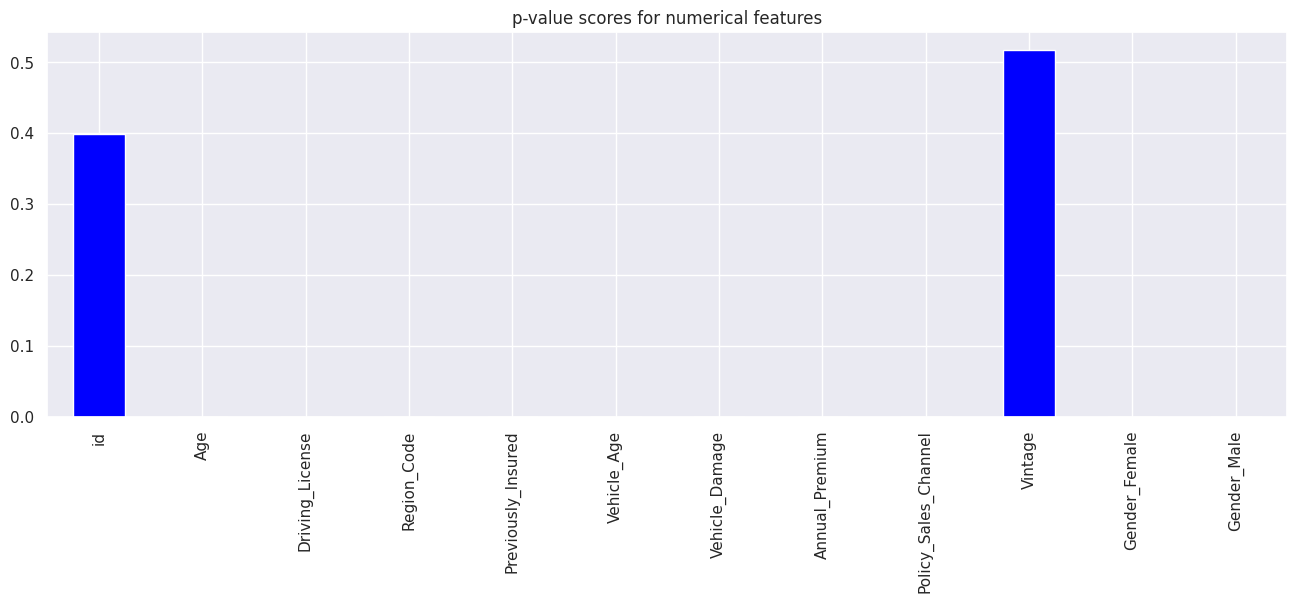

In [ ]:
#The Second array consists of p-values that we need.
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()

We can drop Id and Vintage columns as per the above chart.

# Feature Importance

<Axes: >

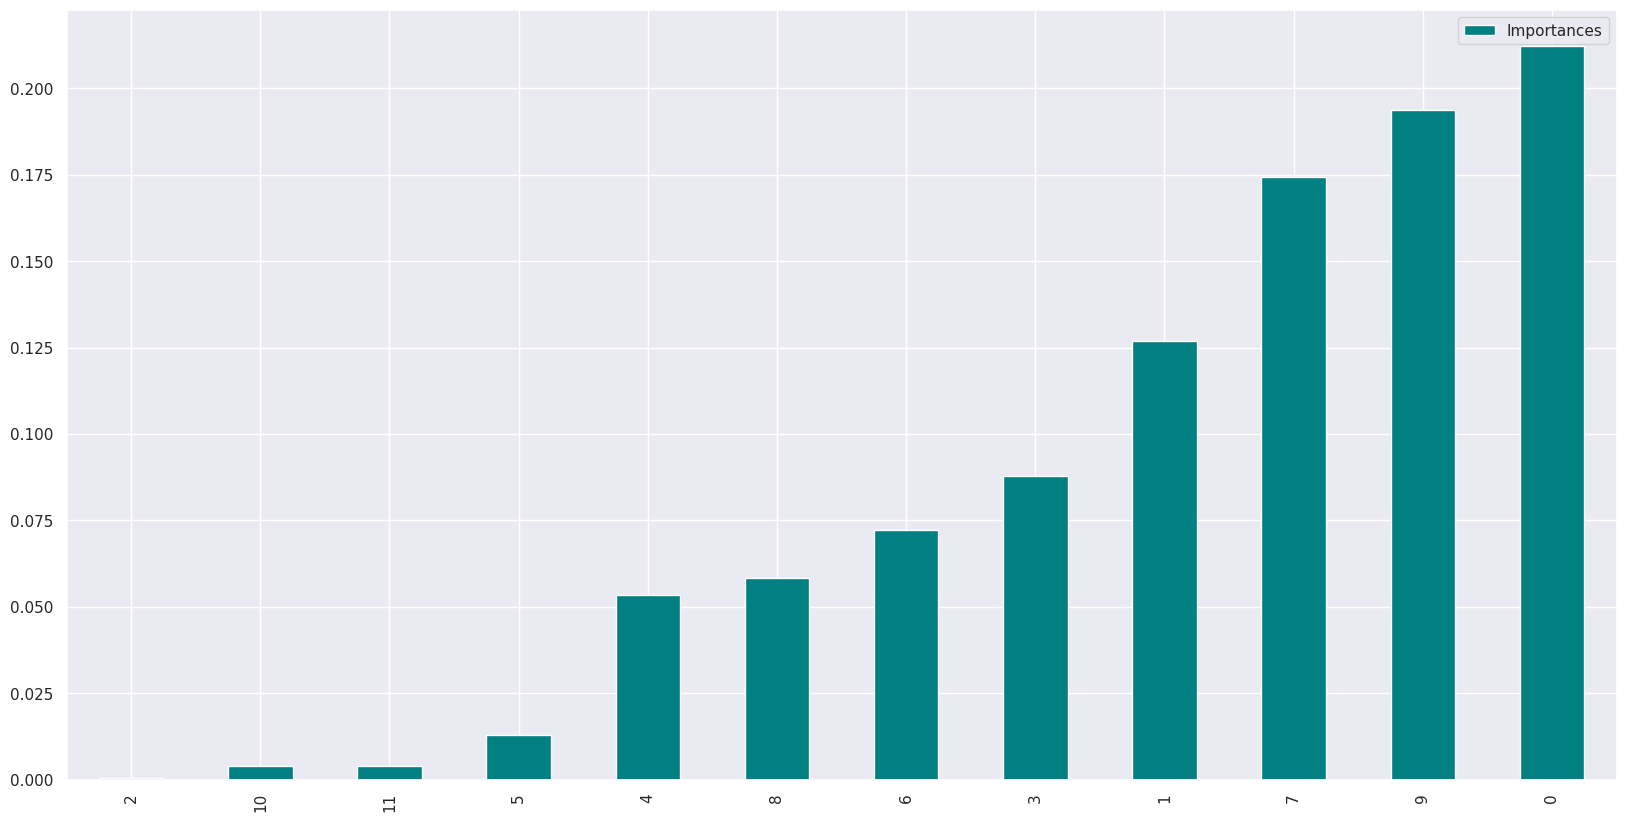

In [ ]:
#Checking Feature importance by using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Create the random forest with hyperparameters
model= RandomForestClassifier(n_estimators=340)
# Fit the mmodel
model.fit(independent,dependent)
# get the importance of thr resulting features
importances= model.feature_importances_
# Create a data frame for visualization
final_df= pd.DataFrame({"Features": pd.DataFrame(independent).columns, "Importances": importances})
final_df.set_index('Importances')
# Sort in ascending order to better visualization
final_df= final_df.sort_values('Importances')
# Plot the feature importances in bars
final_df.plot.bar(color='teal')



*   So after doing F_Classifier and RandomForestClassifier we can observe that id,vintage,Gender are less important. So we can drop those columns.



In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
 11  Gender_Female         381109 non-null  float64
 12  Gender_Male           381109 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 37.8 MB


In [ ]:
df1.drop(['id','Vintage'],axis=1,inplace=True)

# Correlation Feature Selection


Text(0.5, 1.05, 'Pearson correlation of Features')

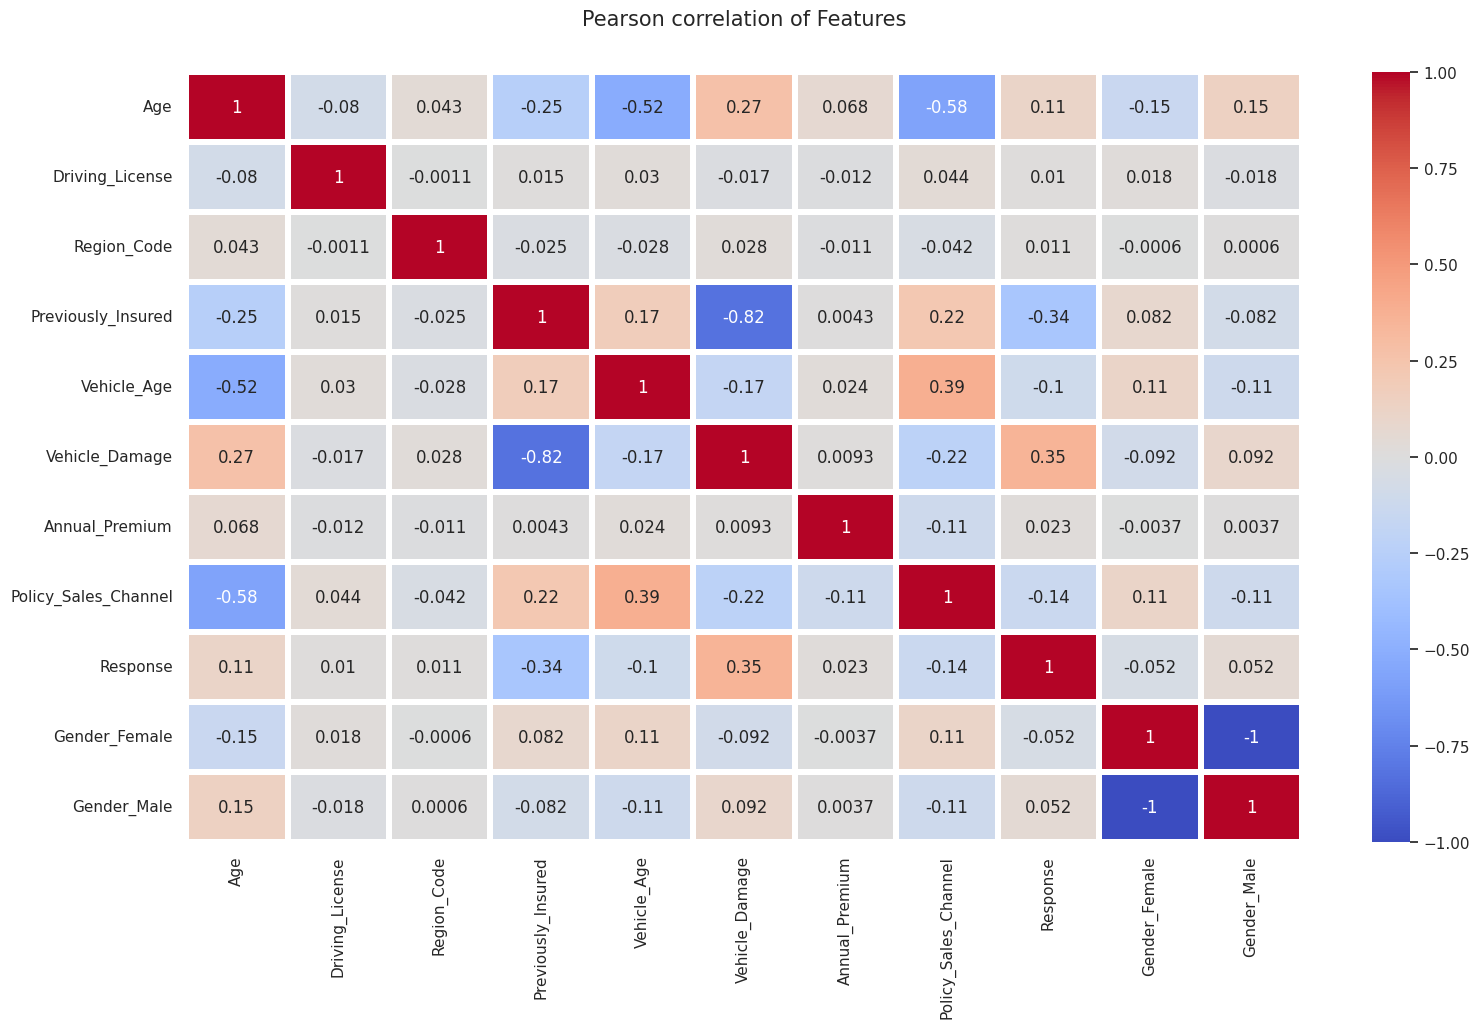

In [ ]:
#Checking correlation of all the columns using heatmap
plt.figure(figsize = (18,10))
correlation = df1.corr()
sns.heatmap(correlation, annot= True,linewidths=3,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=15)

Observations based on correlation plot:-

Gender_female and male 100% Multicollinearity we can remove any one feature among these 2
Previously insured and vechicle_damage have high correlations with dependent variable

In [ ]:
#Dropping gender female
df1.drop('Gender_Female',axis=1,inplace=True)

Obsservation-

We have remove Gender_female since it has 100% Multicollinearity with male columns. So, we can remove any one feature among these 2.

In [ ]:
#Checking shape after removing 3 columns
df1.shape

(381109, 10)

The final dataset shape will be used in Model Training.

## Split Train & Test data

In [ ]:
#Splitting the data into train and test data

X = df1.drop(['Response'], axis=1) #Contain all independent variables
y = df1['Response'] 

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.30,random_state=0)
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(266776, 9) (114333, 9) (266776,) (114333,)


In [ ]:
#Make a list to get most important Features
train_col_list = list(Xtrain.columns)
train_col_list

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Gender_Male']

In [ ]:
ytrain = ytrain.values.reshape(-1,1)

In [ ]:
ytest = ytest.values.reshape(-1,1)

In [ ]:
ytrain.shape

(266776, 1)

In [ ]:
ytest.shape

(114333, 1)

## **Handling Imbalanced data**

One of the most significant challenges when dealing with unbalanced datasets is the metrics used to evaluate their model. Using simpler metrics, such as accuracy score, can be misleading. In a dataset with highly unbalanced classes, the classifier will always "predict" the most common class without performing any feature analysis, and while it will have a high accuracy rate, it will often be incorrect.

### Using Over Sampling Technique

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(Xtrain, ytrain)

print('Original dataset shape', len(HIDF1))
print('Resampled dataset shape', len(y_ros))
print('Resampled dataset shape', len(X_ros))
print('Resampled dataset shape', len(ytrain))
print('Resampled dataset shape', len(Xtrain))

Original dataset shape 381109
Resampled dataset shape 468316
Resampled dataset shape 468316
Resampled dataset shape 266776
Resampled dataset shape 266776


Observation-

The dataset has now been balanced using the oversampling technique, and it is ready for training the model.



###Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_ros = scaler.fit_transform(X_ros)
Xtest = scaler.transform(Xtest)

 

*   Scaled down the train varible which makes easy for a model to learn.



# Model Training

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

In [ ]:
#Defining all these models
models = [
           ['LinearClassifier: ', Perceptron()],
           ['LogisticRegresseer:', LogisticRegression()],
           ['GNB: ', GaussianNB()],
           ['BNB: ', BernoulliNB()],
           ['KNeighborsClassifier: ', KNeighborsClassifier()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['RandomForestClassifier ',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBRFClassifier: ', XGBRFClassifier()],
           ['AdaBoostClassifier: ',AdaBoostClassifier()],
           ['LgbmClassifier: ', lgb.LGBMClassifier()]
         ]

In [ ]:
#store all the metrics values in data frame
import time
model_data = []
for name,curr_model in models :
      curr_model_data = {}
      curr_model.random_state = 42
      curr_model_data["Name"] = name
      start = time.time()
      curr_model.fit(X_ros,y_ros)
      end = time.time()
      y_train_pred=curr_model.predict(X_ros)
      y_test_pred= curr_model.predict(Xtest)
      curr_model_data["Train_Time"] = end - start
      curr_model_data["Train accuracy"] =accuracy_score(y_ros,y_train_pred )
      curr_model_data["Test accuracy"] =accuracy_score(ytest, y_test_pred)
      curr_model_data["Train precision"] = precision_score(y_ros,y_train_pred)
      curr_model_data["Test precision"] = precision_score(ytest,y_test_pred)
      curr_model_data["Train recall"] = recall_score(y_ros,y_train_pred)
      curr_model_data["Test recall"] = recall_score(ytest,y_test_pred)
      curr_model_data["Train f1 score"] = f1_score(y_ros,y_train_pred)
      curr_model_data["Test f1 score"] = f1_score(ytest,y_test_pred)
      curr_model_data['Train ROC-AUC'] = roc_auc_score(y_ros,y_train_pred)
      curr_model_data["Test ROC-AUC"] = roc_auc_score(ytest,y_test_pred)
      model_data.append(curr_model_data)
 

In [ ]:
results = pd.DataFrame(model_data)
results

,Name,Train_Time,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC
0,LinearClassifier:,0.443567,0.757691,0.664734,0.707163,0.253378,0.879645,0.883622,0.784030,0.393826,0.757691,0.758792
1,LogisticRegresseer:,1.648660,0.784026,0.638722,0.705400,0.251498,0.975423,0.977221,0.818722,0.400041,0.784026,0.784178
2,GNB:,0.096191,0.784022,0.638713,0.705396,0.251493,0.975423,0.977221,0.818719,0.400035,0.784022,0.784173
3,BNB:,0.122759,0.786640,0.645063,0.708572,0.254691,0.973787,0.975802,0.820275,0.403948,0.786640,0.787185
4,KNeighborsClassifier:,1.160682,0.903740,0.766629,0.860280,0.286320,0.964054,0.598567,0.909216,0.387353,0.903740,0.694411
5,DecisionTreeClassifier:,2.231581,0.988540,0.820970,0.979439,0.294516,0.998031,0.324297,0.988648,0.308690,0.988540,0.607545
6,RandomForestClassifier,56.316328,0.988527,0.825212,0.978984,0.307778,0.998488,0.334729,0.988640,0.320688,0.988527,0.614447
7,GradientBoostingClassifier:,42.818969,0.798079,0.701276,0.738096,0.282578,0.924043,0.925135,0.820668,0.432922,0.798079,0.797470
8,XGBRFClassifier:,28.981629,0.795322,0.694375,0.733783,0.278355,0.926938,0.929109,0.819128,0.428373,0.795322,0.795242
9,AdaBoostClassifier:,10.590283,0.796545,0.688917,0.731119,0.275971,0.938089,0.938618,0.821772,0.426533,0.796545,0.796216


Observation -

Hurrah! Here are the results of all the models. The best evaluation metric is recall, and we can see that Boosting Algorithms are performing well in this case.

However, we can perform hyperparameter tuning on these models to determine the optimum model.

<Axes: title={'center': 'Accuracy Score Results'}, xlabel='Name'>

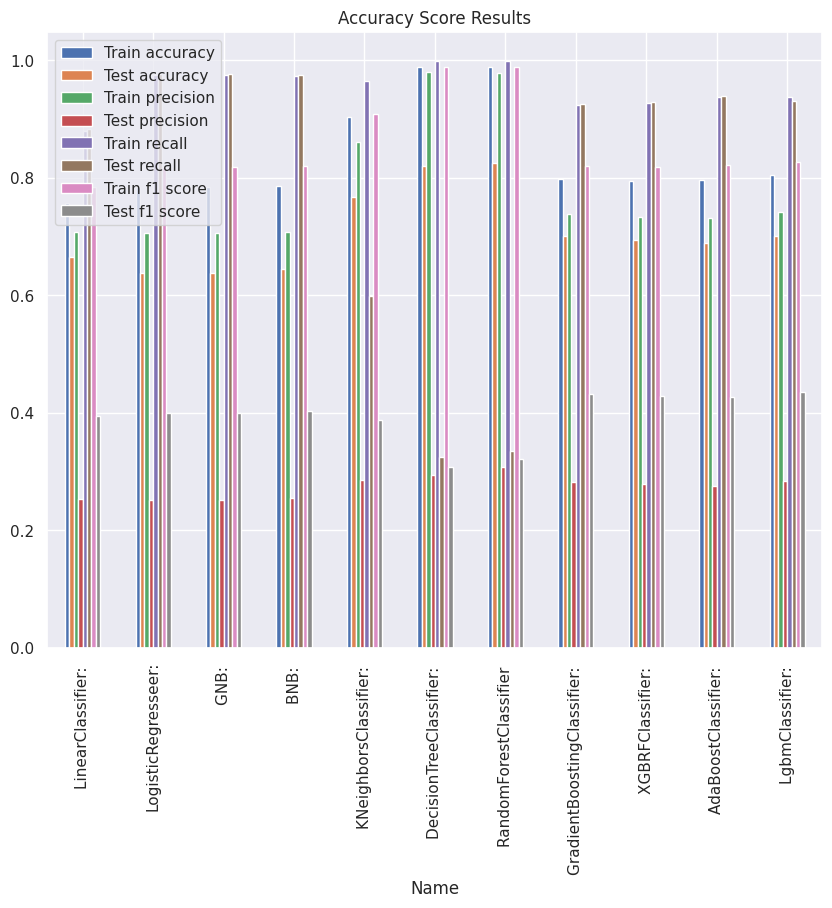

In [ ]:
#Draw plot for above models metrices
results.plot(x="Name", y=['Train accuracy' , 'Test accuracy' ,'Train precision','Test precision','Train recall','Test recall','Train f1 score','Test f1 score'], kind="bar" , title = 'Accuracy Score Results' , figsize= (10,8)) 

Observation -

RandomForestClassifier is performing well in terms of accuracy.



In [ ]:
model_data2 = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_ros,y_ros)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["conf_mat"] = confusion_matrix(ytest,[round(value) for value in (curr_model.predict(Xtest))])
    model_data2.append(curr_model_data)

In [ ]:
Conf_Mat_df= pd.DataFrame(model_data2)
Conf_Mat_df

,Name,Train_Time,conf_mat
0,LinearClassifier:,0.452976,"[[63549, 36692], [1640, 12452]]"
1,LogisticRegresseer:,1.683904,"[[59256, 40985], [321, 13771]]"
2,GNB:,0.108600,"[[59255, 40986], [321, 13771]]"
3,BNB:,0.116348,"[[60001, 40240], [341, 13751]]"
4,KNeighborsClassifier:,0.832080,"[[79216, 21025], [5657, 8435]]"
5,DecisionTreeClassifier:,1.691217,"[[89294, 10947], [9522, 4570]]"
6,RandomForestClassifier,61.127298,"[[89632, 10609], [9375, 4717]]"
7,GradientBoostingClassifier:,44.664299,"[[67142, 33099], [1055, 13037]]"
8,XGBRFClassifier:,29.024441,"[[66297, 33944], [999, 13093]]"
9,AdaBoostClassifier:,12.594822,"[[65539, 34702], [865, 13227]]"


Observation -

We can observe from the confusion matrix that LgbmClassifier, XGBRFClassifier are the top models.


## Let's perform Cross Validation and Hyper parameter tuning on these models to get better results.

## Hyperparameter Tuning on RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=40)
#Cross validation and hyperparameter tuning
rf_bayes = BayesSearchCV(estimator= rf,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=10)

rf_bayes.fit(X_ros,y_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=99, max_features=log2, min_samples_leaf=22, min_samples_split=5, n_estimators=115; total time=  46.3s
[CV] END max_depth=99, max_features=log2, min_samples_leaf=22, min_samples_split=5, n_estimators=115; total time=  45.1s
[CV] END max_depth=99, max_features=log2, min_samples_leaf=22, min_samples_split=5, n_estimators=115; total time=  44.7s
[CV] END max_depth=99, max_features=log2, min_samples_leaf=22, min_samples_split=5, n_estimators=115; total time=  44.6s
[CV] END max_depth=99, max_features=log2, min_samples_leaf=22, min_samples_split=5, n_estimators=115; total time=  44.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=36, max_features=log2, min_samples_leaf=31, min_samples_split=36, n_estimators=126; total time=  46.7s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=31, min_samples_split=36, n_estimators=126; total time=  46.0s
[CV] END max_depth=36, max_featur

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=95, min_samples_split=15, n_estimators=121; total time=  39.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=95, min_samples_split=15, n_estimators=121; total time=  38.9s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=95, min_samples_split=15, n_estimators=121; total time=  40.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=95, min_samples_split=15, n_estimators=121; total time=  39.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=95, min_samples_split=15, n_estimators=121; total time=  40.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=79, max_features=sqrt, min_samples_leaf=95, min_samples_split=39, n_estimators=65; total time=  21.6s
[CV] END max_depth=79, max_features=sqrt, min_samples_leaf=95, min_samples_split=39, n_estimators=65; total time=  20.8s
[CV] END max_depth=79, max_features=sqrt, min_samples_leaf=95, min_samples_split=39, n_estimators=65; total time=  22.1s
[CV] END max_depth=79, max_features=sqrt, min_samples_leaf=95, min_samples_split=39, n_estimators=65; total time=  20.2s
[CV] END max_depth=79, max_features=sqrt, min_samples_leaf=95, min_samples_split=39, n_estimators=65; total time=  22.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=36, min_samples_split=26, n_estimators=86; total time=  30.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=36, min_samples_split=26, n_estimators=86; total time=  30.8s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=36, min_samples_split=26, n_estimators=86; total time=  31.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=36, min_samples_split=26, n_estimators=86; total time=  32.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=36, min_samples_split=26, n_estimators=86; total time=  31.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=84, min_samples_split=69, n_estimators=55; total time=  18.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=84, min_samples_split=69, n_estimators=55; total time=  19.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=84, min_samples_split=69, n_estimators=55; total time=  18.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=84, min_samples_split=69, n_estimators=55; total time=  18.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=84, min_samples_split=69, n_estimators=55; total time=  19.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=75, max_features=sqrt, min_samples_leaf=61, min_samples_split=87, n_estimators=122; total time=  41.8s
[CV] END max_depth=75, max_features=sqrt, min_samples_leaf=61, min_samples_split=87, n_estimators=122; total time=  42.5s
[CV] END max_depth=75, max_features=sqrt, min_samples_leaf=61, min_samples_split=87, n_estimators=122; total time=  42.2s
[CV] END max_depth=75, max_features=sqrt, min_samples_leaf=61, min_samples_split=87, n_estimators=122; total time=  42.6s
[CV] END max_depth=75, max_features=sqrt, min_samples_leaf=61, min_samples_split=87, n_estimators=122; total time=  43.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=38, max_features=log2, min_samples_leaf=59, min_samples_split=68, n_estimators=93; total time=  32.4s
[CV] END max_depth=38, max_fea

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
              n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
rf_bayes.best_params_

OrderedDict([('max_depth', 56),
             ('max_features', 'log2'),
             ('min_samples_leaf', 17),
             ('min_samples_split', 68),
             ('n_estimators', 108)])

In [ ]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=56, max_features='log2', min_samples_leaf=17,
                       min_samples_split=68, n_estimators=108, random_state=40)

In [ ]:
#make prediction
train_pred=rf_bayes.best_estimator_.predict(X_ros)
test_pred=rf_bayes.best_estimator_.predict(Xtest)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_ros, train_pred)
test_accuracy = accuracy_score(ytest, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8295210925955978
The accuracy on test dataset is 0.7188213376715384


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_ros, train_pred)
test_cm = confusion_matrix(ytest, test_pred)

In [ ]:
train_cm
test_cm

array([[69546, 30695],
       [ 1453, 12639]])

In [ ]:
print(classification_report(y_ros,train_pred))
print("\n")
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81    234158
           1       0.76      0.95      0.85    234158

    accuracy                           0.83    468316
   macro avg       0.85      0.83      0.83    468316
weighted avg       0.85      0.83      0.83    468316



              precision    recall  f1-score   support

           0       0.98      0.69      0.81    100241
           1       0.29      0.90      0.44     14092

    accuracy                           0.72    114333
   macro avg       0.64      0.80      0.63    114333
weighted avg       0.89      0.72      0.77    114333



## Roc curve for Train data

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip uninstall scikit-learn


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install scikit-learn>=0.22.0


In [ ]:
metrics.plot_roc_curve(rf_bayes, X_ros, y_ros) 

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the model
rf_bayes.fit(X_ros, y_ros)

# Predict probabilities for the positive class
probs = rf_bayes.predict_proba(X_ros)[:, 1]

# Compute the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_ros, probs)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_bayes, X_ros, y_ros)

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_ros, rf_bayes.predict_proba(X_ros)[:, 1])
plt.plot(recall, precision, color='teal')


## Roc curve for Test data

In [ ]:
metrics.plot_roc_curve(rf_bayes, Xtest, ytest)

In [ ]:
metrics.plot_precision_recall_curve(rf_bayes, Xtest, ytest)

## Hyperparameter Tuning on LgbmClassifier

In [ ]:
lgbm = ltb.LGBMClassifier()
#Cross validation and hyperparameter tuning
lg_bayes = BayesSearchCV(estimator= lgbm,
                         search_spaces = {
                          'max_depth':Integer(4,100) ,
                          'num_leaves': Integer(3,200),
                          'n_estimators': Integer(3,200),
                          'min_split_gain': Integer(1.0,10.0),
                          'n_jobs': Integer(1,30),
                        },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=10)

lg_bayes.fit(X_ros,y_ros)

In [ ]:
lg_bayes.best_params_

In [ ]:
lg_bayes.best_estimator_

In [ ]:
#make prediction
lgtrain_pred=lg_bayes.best_estimator_.predict(X_ros)
lgtest_pred=lg_bayes.best_estimator_.predict(Xtest)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_ros, lgtrain_pred)
test_accuracy = accuracy_score(ytest, lgtest_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_ros, lgtrain_pred)
test_cm = confusion_matrix(ytest, lgtest_pred)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_ros,lgtrain_pred))
print("\n")
print(classification_report(ytest,lgtest_pred))

## Roc curve for Train data

In [ ]:
metrics.plot_roc_curve(lg_bayes, X_ros, y_ros) 

In [ ]:
metrics.plot_precision_recall_curve(lg_bayes, X_ros, y_ros)

## Roc Curve for Test data

In [ ]:
metrics.plot_roc_curve(lg_bayes, Xtest, ytest)metrics.plot_precision_recall_curve(lg_bayes, Xtest, ytest)

In [ ]:
metrics.plot_precision_recall_curve(lg_bayes, Xtest, ytest)Observation

# **Observation**

The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with LGBM and Random Forest models performed better than other models.

In comparison to both models, the LGBM model performed well on the most essential evaluation metric, 'Recall,' with values of 0.95 on train data and 0.92 on test data. As a result, we conclude LGBMClassifier is the best model for this dataset.

## Finally, let us highlight the most important features that will be beneficial to the client.


In [ ]:
importances = lg_bayes.best_estimator_.feature_importances_
importance_dict = {'Feature' : train_col_list,
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
#Our top feature in descending order
importance_df.sort_values(by=['Feature Importance'],ascending=False)

The most significant features are listed from top to bottom.




##**Conclusion:**

Our client is an insurance firm that has supplied Health Insurance to its customers. They now need assistance in developing a model to predict whether the policyholders (customers) from the previous year will be interested in the company's Vehicle Insurance.

Building a model to predict if a client is interested in Vehicle Insurance is extremely beneficial to the company because they can then plan communication strategy to reach out to those customers and optimise its business model and revenue.

Now, we have information about demographics (gender, age, region code type), vehicles (vehicle age, damage), policies (premium, sourcing channel), and so on to predict whether the customer would be interested in Vehicle insurance.

Key points:

Customers of age between 30 to 60 are more likely to buy insurance.

Customers with Vehicle_Damage are likely to buy insurance.

Customers with Driving License have higher chance of buying Insurance.

The variable such as Age, Previously_insured,Annual_premium are more affecting the target variable.

We can see that LGBM model preform better for this dataset.



Improvements:

By using a marketing and advertising approach, we can reduce the gender gap.

We can clearly see that we have a larger number of consumers without vehicle insurance, therefore we can easily target them directly with our campaign.

Since there are less policy holders with vehicles older than two years, we must pay more attention to the other two categories (1-2 years and >1 year). Because most sales agencies that offer vehicle insurance for the first year are actually our target and we can give them the best incentives to reduce competition in the market.

As we saw that we have nearly equal policy holders for both vehicle damage status, so we can target those policy holders whose vehicles are damaged in the past.